In [1]:
! pip install mysql-connector-python
! pip install PyMySQL
! pip install ipython-sql
! pip install mysqlclient
! pip install pandas 
! pip install matplotlib 
! pip install seaborn 
! pip install scikit-learn

In [6]:
import  mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
connection = mysql.connector.connect(
user='root',
password='1234',
host='localhost',
database='netflix'
)
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [10]:
cursor.execute("SELECT * FROM netflix1")

In [12]:
netflix1 = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [14]:
print(netflix1)

    show_id     type                                    title  \
0        s1    Movie                     Dick Johnson Is Dead   
1        s3  TV Show                                Ganglands   
2        s6  TV Show                            Midnight Mass   
3       s14    Movie         Confessions of an Invisible Girl   
4        s8    Movie                                  Sankofa   
..      ...      ...                                      ...   
523   s2041  TV Show                 Transformers: Cyberverse   
524   s2059  TV Show  The Witcher: A Look Inside the Episodes   
525   s2124  TV Show                  DÃ©rÃ¨: An African Tale   
526   s2223  TV Show               Street Food: Latin America   
527   s2237    Movie      Little Singham: Legend of Dugabakka   

            director        country  date_added  release_year rating  \
0    Kirsten Johnson  United States   9/25/2021          2020  PG-13   
1    Julien Leclercq         France   9/24/2021          2021  TV-MA   
2  

In [16]:
netflix1.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,05-01-2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,05-01-2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [18]:
print(netflix1.tail())

    show_id     type                                    title   director  \
523   s2041  TV Show                 Transformers: Cyberverse  Not Given   
524   s2059  TV Show  The Witcher: A Look Inside the Episodes  Not Given   
525   s2124  TV Show                  DÃ©rÃ¨: An African Tale  Not Given   
526   s2223  TV Show               Street Food: Latin America  Not Given   
527   s2237    Movie      Little Singham: Legend of Dugabakka  Not Given   

      country  date_added  release_year rating   duration  \
523  Pakistan  2020-07-09          2020  TV-Y7  2 Seasons   
524  Pakistan  2020-02-09          2020  TV-MA   1 Season   
525  Pakistan   8-15-2020          2016  TV-PG   1 Season   
526  Pakistan   7-21-2020          2020  TV-PG   1 Season   
527  Pakistan   7-15-2020          2020  TV-Y7     68 min   

                                             listed_in  
523                                           Kids' TV  
524                    Docuseries, TV Sci-Fi & Fantasy  
525  

In [20]:
print(netflix1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       528 non-null    object
 1   type          528 non-null    object
 2   title         528 non-null    object
 3   director      528 non-null    object
 4   country       528 non-null    object
 5   date_added    528 non-null    object
 6   release_year  528 non-null    int64 
 7   rating        528 non-null    object
 8   duration      528 non-null    object
 9   listed_in     528 non-null    object
dtypes: int64(1), object(9)
memory usage: 41.4+ KB
None


In [24]:
print(netflix1.shape)


(528, 10)


In [28]:
netflix1['type'].value_counts()

type
Movie      290
TV Show    238
Name: count, dtype: int64

Text(0.5, 0.98, 'Total Content on Netflix')

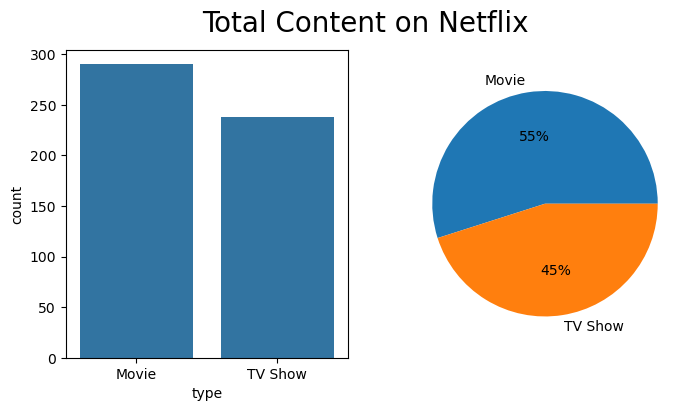

In [36]:
# 1. WHAT IS THE TOTAL CONTENT ON NETFLIX?

freq=netflix1['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(netflix1, x=netflix1['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

In [42]:
netflix1['rating'].value_counts()


rating
TV-MA    154
TV-14     86
TV-PG     60
PG-13     56
TV-Y7     48
R         44
TV-Y      34
PG        28
TV-G      16
G          2
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating on Netflix')

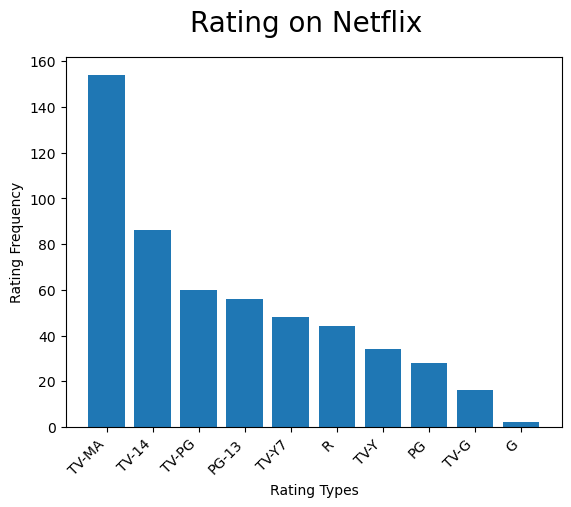

In [44]:
# 2. WHAT IS THE VISUAL REPRESENTAITON OF RATING FREQUENCY OF MOVIES AND TV SHOWS ON NETFLIX?

ratings=netflix1['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

In [53]:
#Converting date_added column to datetime.
netflix1['date_added'] = pd.to_datetime(netflix1['date_added'], format='mixed', errors='coerce')


In [55]:
netflix1.describe()

,date_added,release_year
count,528,528.000000
mean,2021-05-24 00:19:05.454545408,2014.458333
min,2018-05-18 00:00:00,1961.000000
25%,2021-03-08 18:00:00,2010.750000
50%,2021-07-30 00:00:00,2020.000000
75%,2021-09-10 00:00:00,2021.000000
max,2021-12-06 00:00:00,2021.000000
std,NaN,10.519620


In [57]:
netflix1['country'].value_counts()

country
Pakistan          246
United States     136
Not Given          40
Japan              24
India              22
United Kingdom     14
France              8
Germany             8
South Africa        6
China               4
Nigeria             4
Brazil              2
Spain               2
Philippines         2
Australia           2
Argentina           2
Canada              2
Hong Kong           2
Italy               2
Name: count, dtype: int64

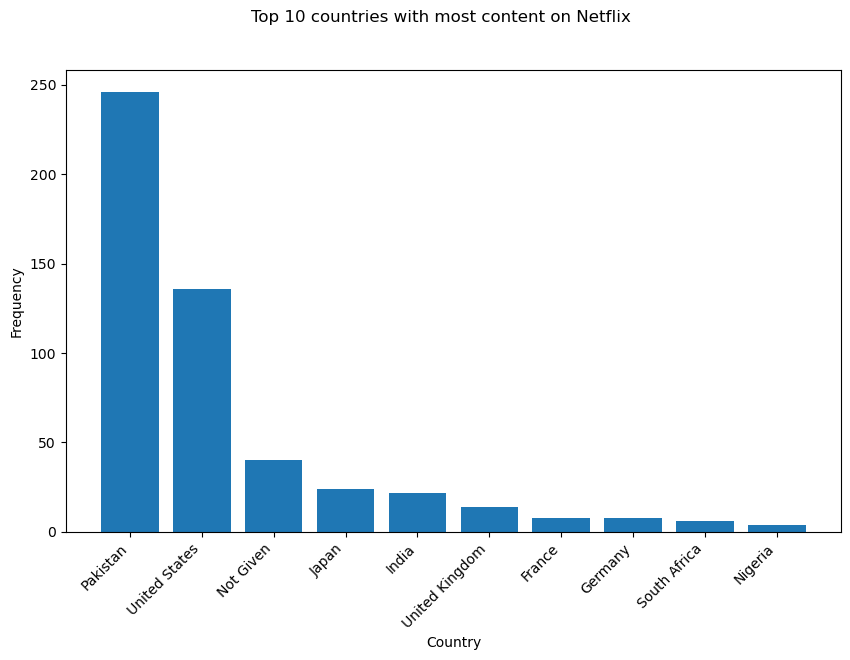

In [79]:
# 3. WHAT ARE THE TOP 10 COUNTRIES WITH MOST CONTENT ON NETFLIX?

top_ten_countries=netflix1['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

In [82]:
netflix1['year']=netflix1['date_added'].dt.year
netflix1['month']=netflix1['date_added'].dt.month
netflix1['day']=netflix1['date_added'].dt.day

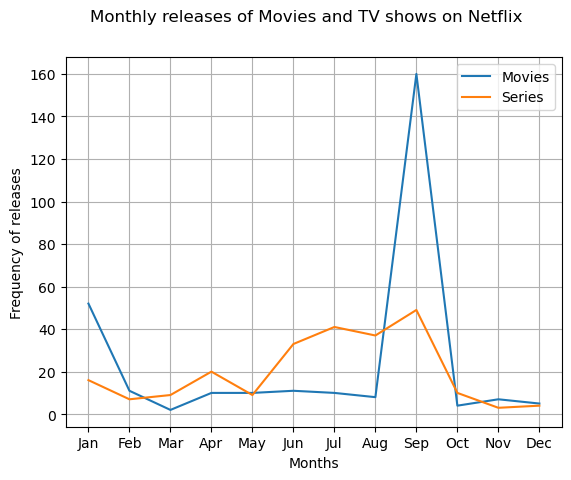

In [84]:
# 4. WHAT ARE THE MONTHLY RELEASES OF MOVIES AND TV SHOWS ON NETFLIX

monthly_movie_release=netflix1[netflix1['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=netflix1[netflix1['type']=='TV Show']['month'].value_counts().sort_index()
 
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values,label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

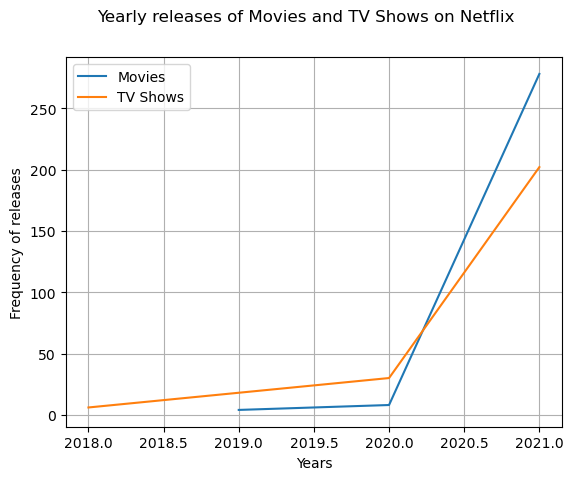

In [89]:
# 5. WHAT ARE THE YEARLY RELEASES OF MOVIES AND TV SHOWS ON NETFLIX

yearly_movie_releases=netflix1[netflix1['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=netflix1[netflix1['type']=='TV Show']['year'].value_counts().sort_index()
 
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

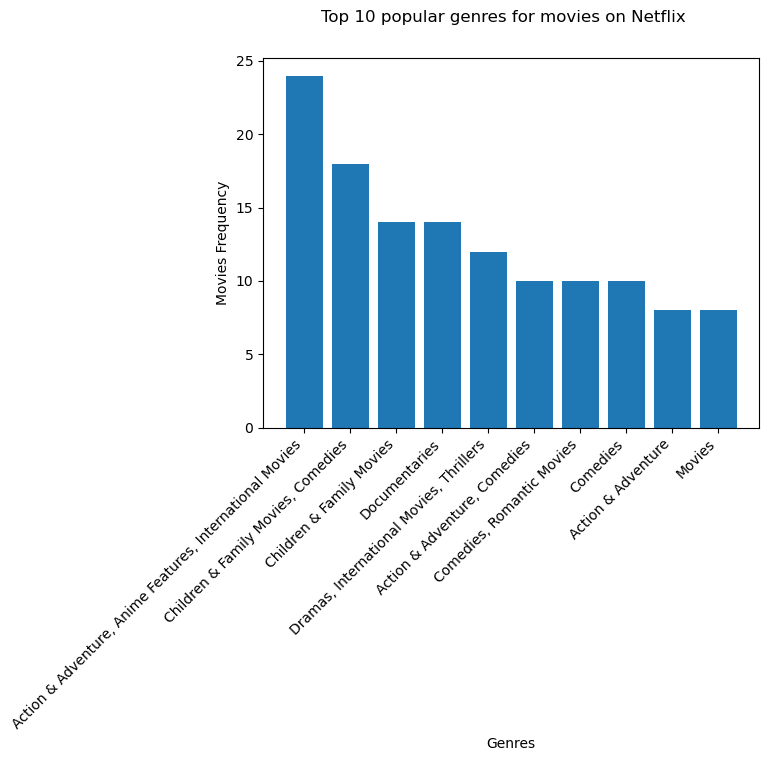

In [101]:
# 6. WHAT ARE THE TOP 10 POPULAR MOVIE GENRES

popular_movie_genre=netflix1[netflix1['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
 
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Suhas Kadav'),
  Text(1, 0, 'Krysia Plonka, Kristian Mercado'),
  Text(2, 0, 'Mark Thornton, Todd Kauffman'),
  Text(3, 0, 'Toshiya Shinohara'),
  Text(4, 0, 'Masahiko Murata'),
  Text(5, 0, 'Wolfgang Petersen'),
  Text(6, 0, 'Antoine Fuqua'),
  Text(7, 0, 'Hajime Kamegaki'),
  Text(8, 0, 'Lasse HallstrÃ¶m'),
  Text(9, 0, 'Delhiprasad Deenadayalan'),
  Text(10, 0, 'Reginald Hudlin'),
  Text(11, 0, 'Jane Campion'),
  Text(12, 0, 'Chapman Way, Maclain Way'),
  Text(13, 0, 'Christian Schwochow')])

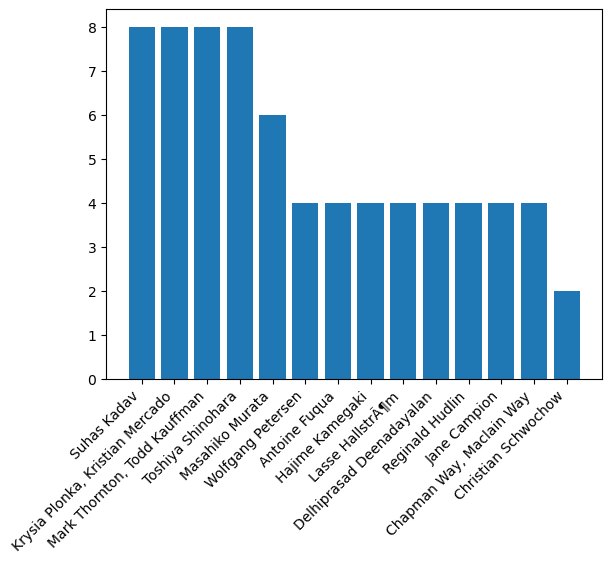

In [107]:
# 7. WHAT ARE THE TOP 10 DIRECTORS ACROSS NETFLIX WITH HIGH FREQUENCY OF MOVIES AND SHOWS

directors=netflix1['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')


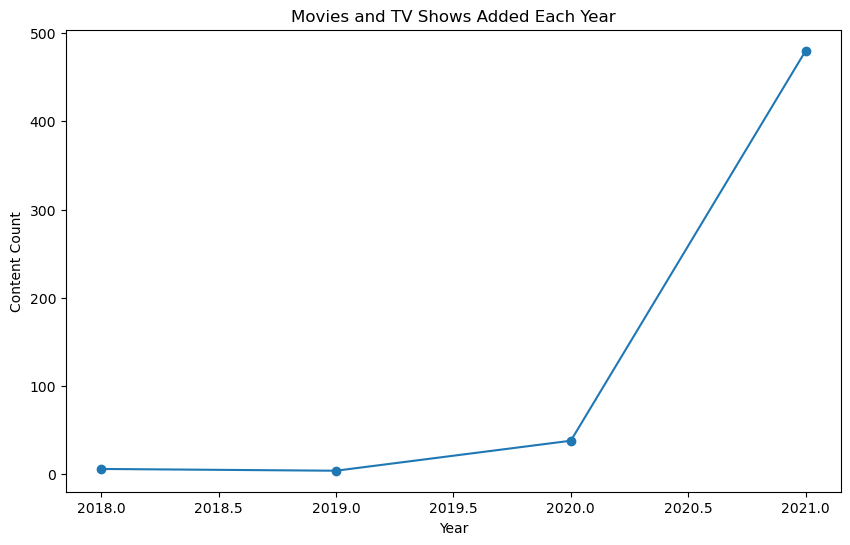

In [126]:
# 8. HOW MANY MOVIES AND TV SHOWS WERE ADDED EACH YEAR?

netflix1['year_added'] = pd.to_datetime(netflix1['date_added']).dt.year
yearly_additions = netflix1.groupby('year_added').size()
yearly_additions.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Movies and TV Shows Added Each Year')
plt.xlabel('Year')
plt.ylabel('Content Count')
plt.show()


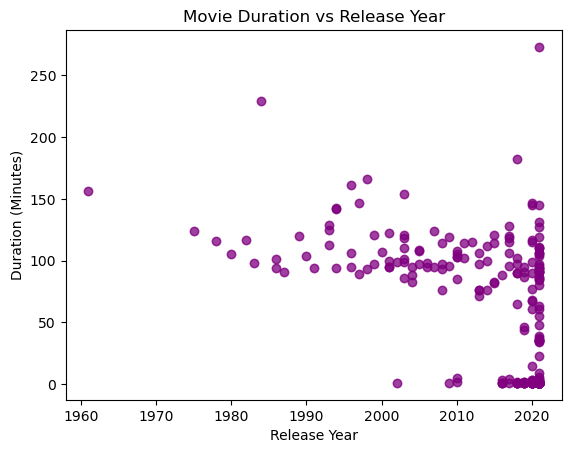

In [131]:
# 9. WHAT IS THE CORRELATON BETWEEN MOVIE DURATION AND RELEASE YEAR

plt.scatter(netflix1['release_year'], netflix1['duration_in_minutes'], alpha=0.5, color='purple')
plt.title('Movie Duration vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()

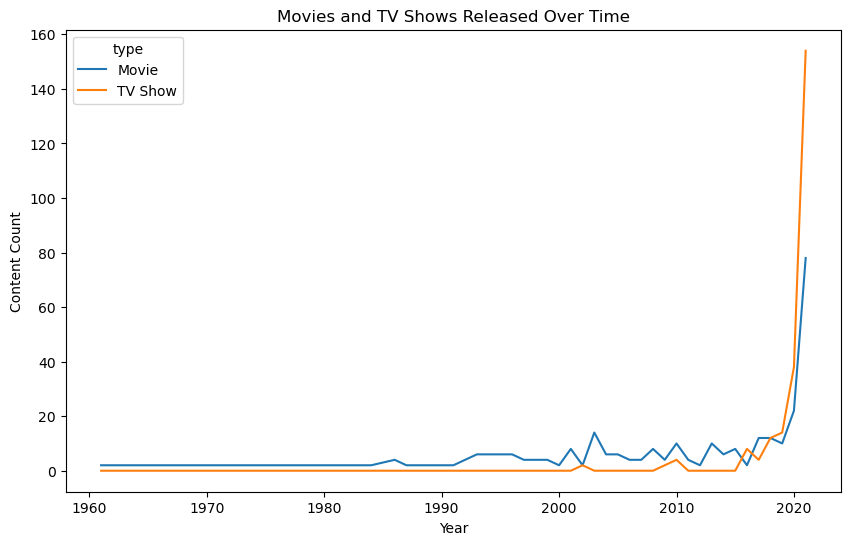

In [135]:
# 10. WHAT IS THE TREND OF TV SHOWS AND MOVIE RELEASES OVER TIME

tv_movies_over_time = netflix1.groupby(['release_year', 'type']).size().unstack().fillna(0)
tv_movies_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Movies and TV Shows Released Over Time')
plt.xlabel('Year')
plt.ylabel('Content Count')
plt.show()


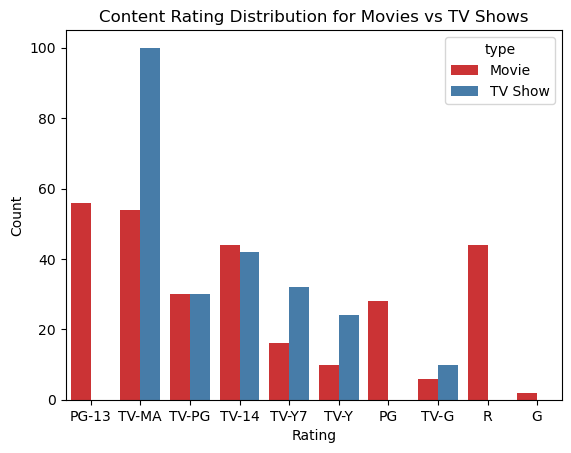

In [138]:
# 11. WHAT IS THE DISTRIBUTION OF CONTENT RATINGS ACROSS DIFFERENT CONTENT TYPES? 

sns.countplot(x='rating', hue='type', data=netflix1, palette='Set1')
plt.title('Content Rating Distribution for Movies vs TV Shows')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()